In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from pathlib import Path

## Loading csv files containing current_time and waiting_time as two columns

In [14]:
current_dir = Path("./").resolve()
csvs_location = Path(str(current_dir) + "/csvs").resolve()
csv_id = 1698677039.2948878

withRL = pd.read_csv(str(Path(str(csvs_location) + f"/log-output-rl-{csv_id}.waiting-time.csv").resolve()), sep=',')
withoutRL =  pd.read_csv(str(Path(str(csvs_location) + f"/log-output-no-rl-{csv_id}.waiting-time.csv").resolve()), sep=',')

In [15]:
withRL.head()

,current_time,waiting_time
0,1.0,0.0
1,31.0,0.0
2,61.0,0.0
3,91.0,23.0
4,131.0,217.0


In [16]:
withoutRL.head()

,current_time,waiting_time
0,11.0,0.0
1,51.0,0.0
2,91.0,11.0
3,131.0,192.0
4,171.0,437.0


## Plotting the values

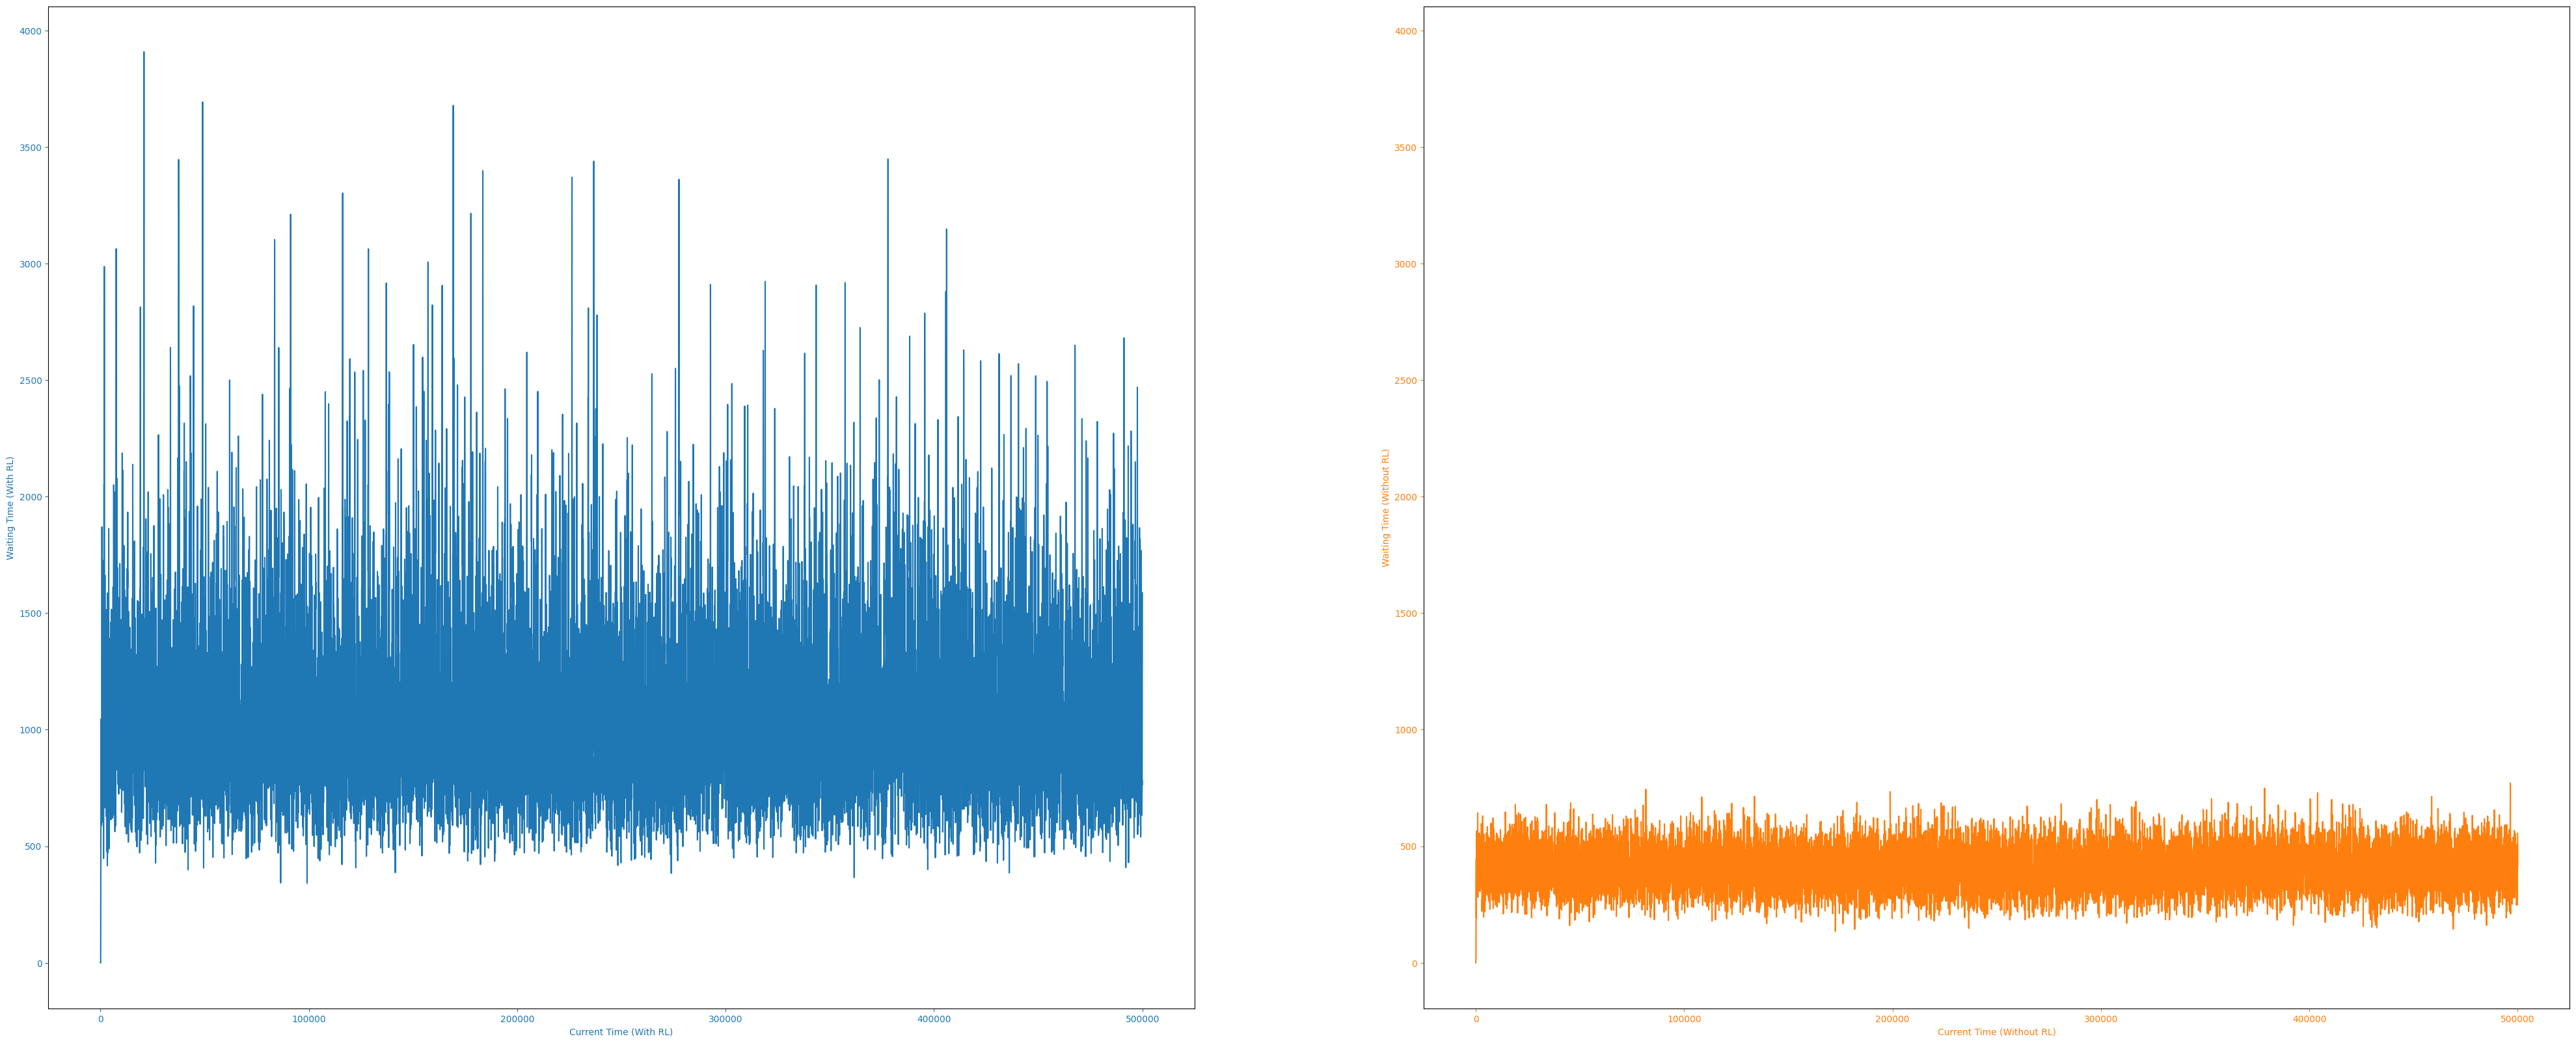

In [38]:
fig=plt.figure(figsize = (50, 20))
ax1=fig.add_subplot(121, label="1")
ax2=fig.add_subplot(122, label="2")

ax1.plot(withRL["current_time"], withRL["waiting_time"], color="C0")
ax1.set_xlabel("Current Time (With RL)", color="C0")
ax1.set_ylabel("Waiting Time (With RL)", color="C0")
ax1.tick_params(axis='x', colors="C0")
ax1.tick_params(axis='y', colors="C0")

ax2.plot(withoutRL["current_time"], withoutRL["waiting_time"], color="C1")
ax2.set_xlabel("Current Time (Without RL)", color="C1")
ax2.set_ylabel("Waiting Time (Without RL)", color="C1")
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.set_ylim(*ax1.get_ylim())

plt.show()

## Best fit lines

[1070.66563346  -17.39392743   43.95468861   11.30509796  -45.6580184 ]
[408.54213942  -2.79334326  19.40868851   3.91408007 -20.53431549]


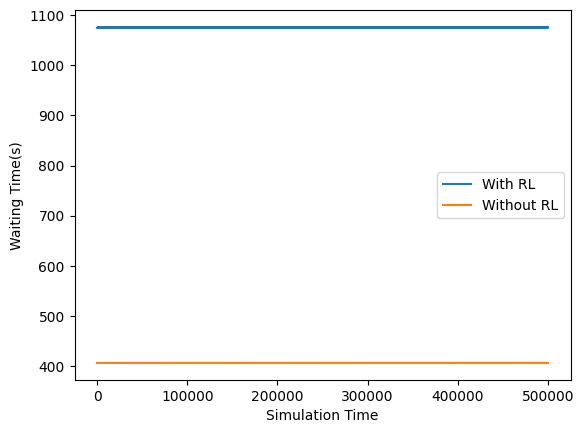

In [37]:
rl_poly = np.polynomial.Polynomial.fit(withRL["current_time"], withRL['waiting_time'], 4)
norl_poly = np.polynomial.Polynomial.fit(withoutRL['current_time'], withoutRL['waiting_time'], 4)

print(rl_poly.coef)
print(norl_poly.coef)

plt.plot(withRL['current_time'], rl_poly(withRL["waiting_time"]), label="With RL")
plt.plot(withoutRL['current_time'], norl_poly(withoutRL["waiting_time"]), label="Without RL")

plt.xlabel("Simulation Time")
plt.ylabel("Waiting Time(s)")
plt.legend()